In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/content/Red Bull F1 Car Wallpaper.jpg')

In [3]:
type(img)

numpy.ndarray

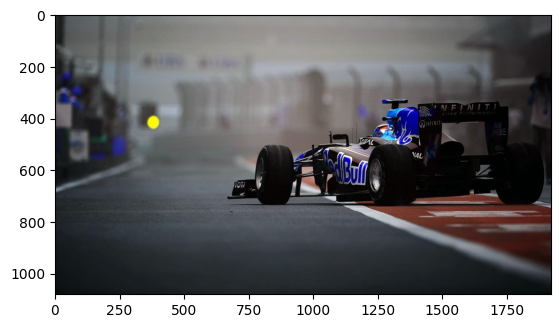

In [4]:
plt.imshow(img)

In [5]:
img.shape

(1080, 1920, 3)

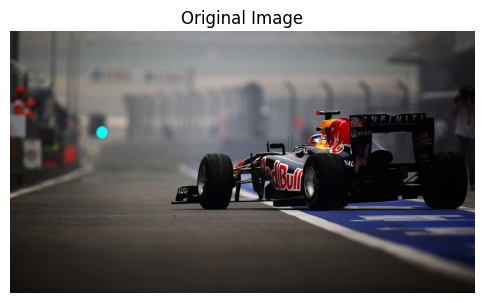

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [7]:
# Image Size
h, w, c = img.shape
print(f"Image Size: {w}x{h}, Channels: {c}")

# Total Pixels
total_pixels = h * w
print(f"Total Pixels: {total_pixels}")

Image Size: 1920x1080, Channels: 3
Total Pixels: 2073600


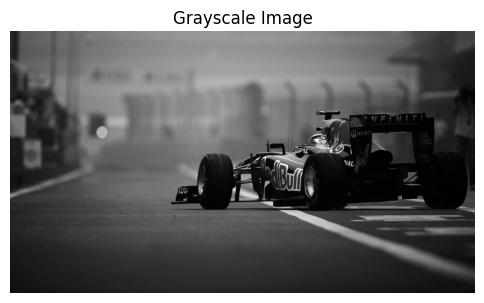

In [8]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

In [9]:
cv2.imwrite('/content/best_album_gray.jpeg', gray_img)

True

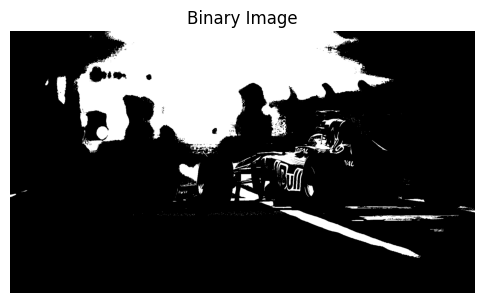

True

In [10]:
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6,6))
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()
cv2.imwrite('/content/best_album_binary.jpeg', binary_img)

In [11]:
black_pixel_count = np.sum(binary_img == 0)
print(f"Total Black Pixels: {black_pixel_count}")

Total Black Pixels: 1645046


In [12]:
def show_image(image, title, cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

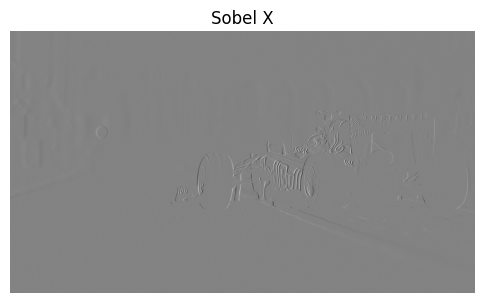

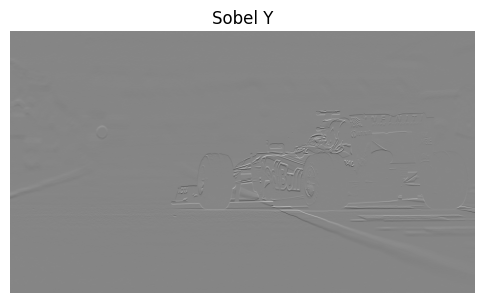

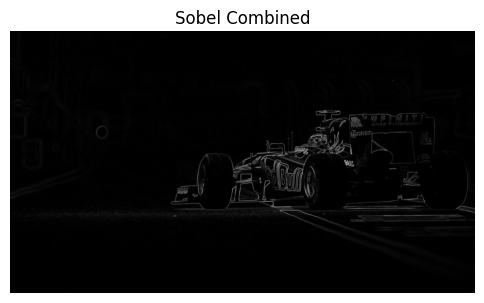

In [13]:
### 1. Edge Detection ###

# i. Sobel Operator (X & Y)
sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

show_image(sobelx, "Sobel X", cmap="gray")
show_image(sobely, "Sobel Y", cmap="gray")
show_image(sobel_combined, "Sobel Combined", cmap="gray")

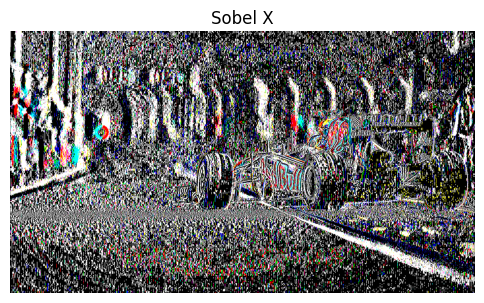

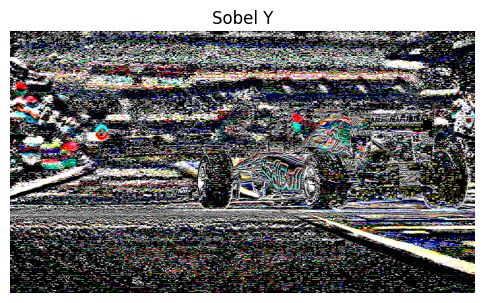

In [14]:
# Sobel Operator (X & Y)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
show_image(sobelx, "Sobel X")
show_image(sobely, "Sobel Y")

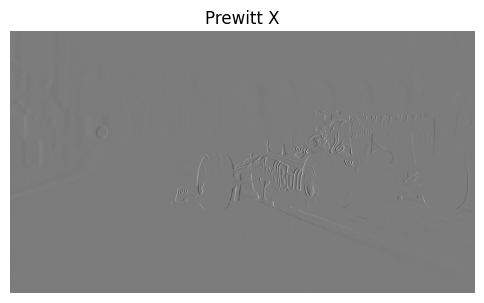

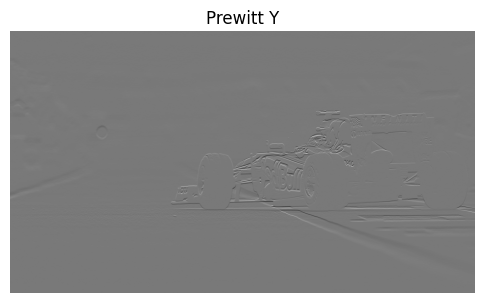

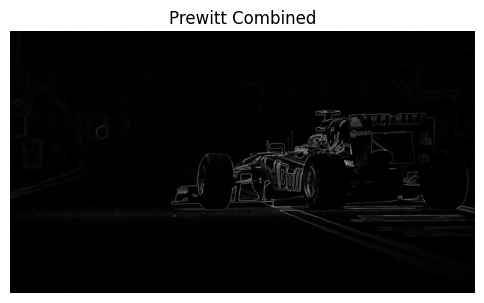

In [15]:
# ii. Prewitt Operator
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewittx = cv2.filter2D(gray_img, cv2.CV_64F, kernelx) # Change ddepth to cv2.CV_64F
prewitty = cv2.filter2D(gray_img, cv2.CV_64F, kernely) # Change ddepth to cv2.CV_64F
prewitt_combined = cv2.magnitude(prewittx, prewitty)

show_image(prewittx, "Prewitt X", cmap="gray")
show_image(prewitty, "Prewitt Y", cmap="gray")
show_image(prewitt_combined, "Prewitt Combined", cmap="gray")

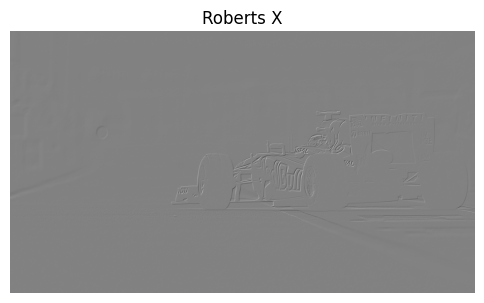

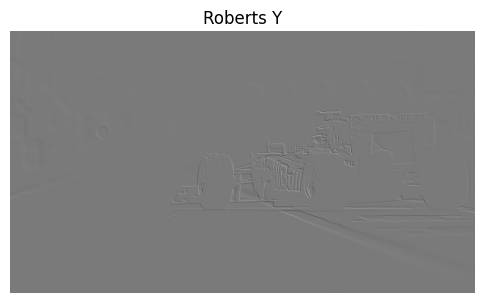

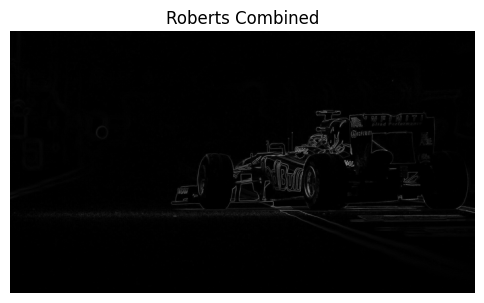

In [16]:
# iii. Roberts Cross Operator
robertsx = cv2.filter2D(gray_img, cv2.CV_64F, np.array([[1, 0], [0, -1]]))
robertsy = cv2.filter2D(gray_img, cv2.CV_64F, np.array([[0, 1], [-1, 0]]))
roberts_combined = cv2.magnitude(robertsx, robertsy)

show_image(robertsx, "Roberts X", cmap="gray")
show_image(robertsy, "Roberts Y", cmap="gray")
show_image(roberts_combined, "Roberts Combined", cmap="gray")

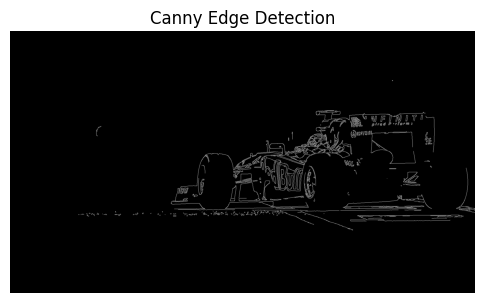

In [17]:
# iv. Canny Edge Detector
canny = cv2.Canny(gray_img, 100, 200)
show_image(canny, "Canny Edge Detection", cmap="gray")

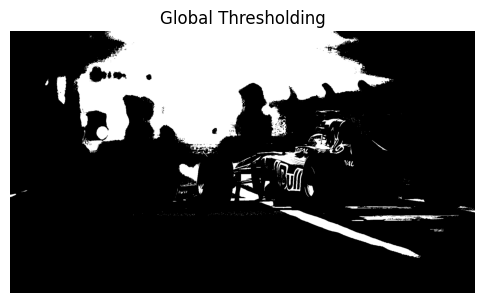

In [18]:
### 2. Image Segmentation ###

# i. Global Thresholding
_, global_thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
show_image(global_thresh, "Global Thresholding", cmap="gray")

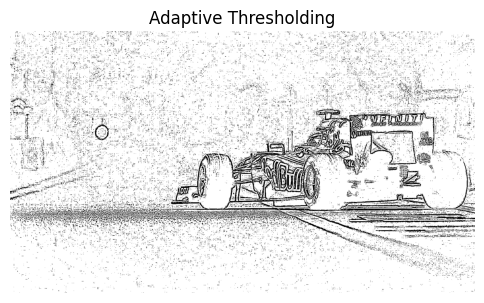

In [19]:
# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
show_image(adaptive_thresh, "Adaptive Thresholding", cmap="gray")

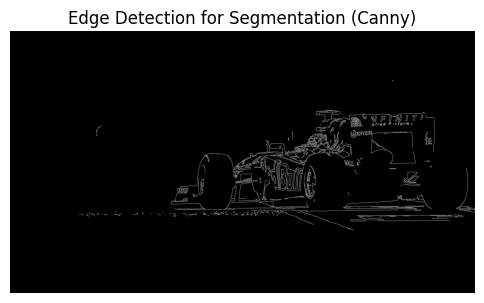

In [20]:
# iii. Edge Detection for Segmentation (Using Canny)
show_image(canny, "Edge Detection for Segmentation (Canny)", cmap="gray")

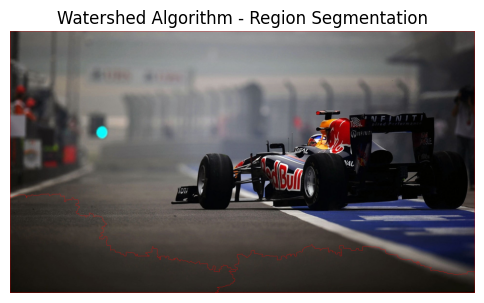

In [21]:
# iv. Region-Based Segmentation (Watershed Algorithm)
# Convert to Grayscale and apply OTSU thresholding
_, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Finding sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
img_copy = img.copy()
markers = cv2.watershed(img_copy, markers)
img_copy[markers == -1] = [255, 0, 0]

show_image(img_copy, "Watershed Algorithm - Region Segmentation")